# Main Street Wholesale Market Sales Prediction Application

In [54]:
print('Welcome to the Main Street Wholesale Market Sales Prediction Application! The application is a specifically built product to help Main Street Market \
predict sales to help meet its business objectives. A step-by-step process follows, demonstrating the application\'s \
inception along with an EDA or Exploratory Data Analysis to its culmination, providing a user interface to test and predict values with \
the trained machine learning model.')

Welcome to the Main Street Wholesale Market Sales Prediction Application! The application is a specifically built product to help Main Street Market predict sales to help meet its business objectives. A step-by-step process follows, demonstrating the application's inception along with an EDA or Exploratory Data Analysis to its culmination, providing a user interface to test and predict values with the trained machine learning model.


In [55]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import klib

warnings.filterwarnings('ignore')

data = pd.read_csv("SuperstoreDataset.csv")

In [56]:
print('The dataset used as part of the development of this application can be found in the following kaggle.com link:\n')
                            
print('https://www.kaggle.com/datasets/shrutigupta2495/the-real-canadian-superstore-dataset')

The dataset used as part of the development of this application can be found in the following kaggle.com link:

https://www.kaggle.com/datasets/shrutigupta2495/the-real-canadian-superstore-dataset


In [57]:
print('We begin the application development process by getting a feel of initial description of the data, taking note of the \
feature counts, mean, quartile ranges, min, and max.')
data.describe()

We begin the application development process by getting a feel of initial description of the data, taking note of the feature counts, mean, quartile ranges, min, and max.


,Row ID,Number of days,Sales,Quantity,Unit Sales,Discount,Profit,Shipping Cost,Unit shipping cost,Profit_per_unit,unit cost
count,51290.00000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,3.969331,246.490581,3.476545,71.657487,0.142908,28.610982,26.375915,7.777773,8.122688,55.758322
std,14806.29199,1.729447,487.565361,2.278766,113.581515,0.212280,174.340972,57.296804,14.755059,43.338665,89.474251
min,1.00000,0.000000,0.444000,1.000000,0.336000,0.000000,-6599.978000,0.000000,0.000000,-1319.995600,0.210000
25%,12823.25000,3.000000,30.758625,2.000000,11.799900,0.000000,0.000000,2.610000,1.000000,0.000000,8.750000
50%,25645.50000,4.000000,85.053000,3.000000,29.400000,0.000000,9.240000,7.790000,2.740000,3.390000,22.280000
75%,38467.75000,5.000000,251.053200,5.000000,82.160000,0.200000,36.810000,24.450000,7.960000,12.240000,65.640000
max,51290.00000,8.000000,22638.480000,14.000000,3773.080000,0.850000,8399.976000,933.570000,363.870000,1679.995200,4070.880000


In [58]:
print('There are many features in this dataset; we can see that many categorical features do not fit. The Order Date feature \
will have to be converted to find a correlation with the target feature, Sales.')
print()
data.head()

There are many features in this dataset; we can see that many categorical features do not fit. The Order Date feature will have to be converted to find a correlation with the target feature, Sales.



,Row ID,Order ID,Order Date,Ship Date,Number of days,Ship Mode,Customer ID,Customer Name,Segment,City,...,Sales,Quantity,Unit Sales,Discount,Profit,Shipping Cost,Order Priority,Unit shipping cost,Profit_per_unit,unit cost
0,33994,CA-2011-145317,3/18/2016,3/23/2016,5,Standard Class,SM-20320,Sean Miller,Home Office,Burnaby,...,22638.480,6,3773.080,0.5,-1811.0784,24.29,Medium,4.05,-301.8464,4070.88
1,31980,US-2014-168116,11/5/2019,11/5/2019,0,Same Day,GT-14635,Grant Thornton,Corporate,Saskatoon,...,7999.980,4,1999.995,0.5,-3839.9904,674.82,High,168.71,-959.9976,2791.29
2,35515,CA-2014-149881,4/2/2019,4/4/2019,2,First Class,NC-18535,Nick Crebassa,Corporate,Quebec,...,4799.984,2,2399.992,0.2,359.9988,10.34,Medium,5.17,179.9994,2214.82
3,39069,CA-2013-108196,11/26/2018,12/3/2018,7,Standard Class,CS-12505,Cindy Stewart,Consumer,Regina,...,4499.985,5,899.997,0.7,-6599.9780,451.63,Low,90.33,-1319.9956,2129.67
4,34448,CA-2012-147830,12/15/2017,12/18/2017,3,First Class,NF-18385,Natalie Fritzler,Consumer,Edmonton,...,1799.994,2,899.997,0.7,-2639.9912,219.62,High,109.81,-1319.9956,2110.18


In [59]:
print('Querying the dataframe for only categorical feature data.')
print()
print()

non_numerical_df = data.select_dtypes(include=['object'])
print(non_numerical_df)

Querying the dataframe for only categorical feature data.


             Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0      CA-2011-145317   3/18/2016   3/23/2016  Standard Class    SM-20320   
1      US-2014-168116   11/5/2019   11/5/2019        Same Day    GT-14635   
2      CA-2014-149881    4/2/2019    4/4/2019     First Class    NC-18535   
3      CA-2013-108196  11/26/2018   12/3/2018  Standard Class    CS-12505   
4      CA-2012-147830  12/15/2017  12/18/2017     First Class    NF-18385   
...               ...         ...         ...             ...         ...   
51285  CA-2011-111899    5/4/2016    5/5/2016     First Class    NC-18340   
51286  CA-2013-151372    9/6/2018    9/7/2018     First Class    JH-15985   
51287  US-2014-163790   11/3/2019   11/5/2019    Second Class    NL-18310   
51288  CA-2014-104822  10/21/2019  10/21/2019        Same Day    RB-19465   
51289  CA-2011-142769   9/13/2016   9/13/2016        Same Day    RP-19390   

          Custo

In [60]:
print('Checking for any null values in the dataframe columns; there are none.')
print()
data.isnull().sum() 

Checking for any null values in the dataframe columns; there are none.



Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Number of days        0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Unit Sales            0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Unit shipping cost    0
Profit_per_unit       0
unit cost             0
dtype: int64

In [61]:
print('There does not appear to be any duplicate values.')
print()
duplicate_rows = data.duplicated()
duplicate_rows

There does not appear to be any duplicate values.



0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool

In [62]:
print('After looking over the data, we decided to drop the features Order ID, Customer Name, Customer ID, City, Country, \
Product ID and Product Name, since we do not think they will contribute to the training of the machine learning model in calculating \
the target variable.')
print()

After looking over the data, we decided to drop the features Order ID, Customer Name, Customer ID, City, Country, Product ID and Product Name, since we do not think they will contribute to the training of the machine learning model in calculating the target variable.



In [63]:
data.drop(['Order ID', 'Customer Name', 'Customer ID', 'City', 'Country', 'Product ID', 'Product Name'], axis=1, inplace=True)
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Row ID              51290 non-null  int64  
 1   Order Date          51290 non-null  object 
 2   Ship Date           51290 non-null  object 
 3   Number of days      51290 non-null  int64  
 4   Ship Mode           51290 non-null  object 
 5   Segment             51290 non-null  object 
 6   State               51290 non-null  object 
 7   Region              51290 non-null  object 
 8   Category            51290 non-null  object 
 9   Sub-Category        51290 non-null  object 
 10  Sales               51290 non-null  float64
 11  Quantity            51290 non-null  int64  
 12  Unit Sales          51290 non-null  float64
 13  Discount            51290 non-null  float64
 14  Profit              51290 non-null  float64
 15  Shipping Cost       51290 non-null  float64
 16  Orde

We will want to get some visualizations of the data. We begin by observing some correlation matrices or heatmaps will be helpful. A heatmap will help us note any correlations between independent features and dependent feature, Sales.



Text(0.5, 1.0, 'Correlation Matrix')

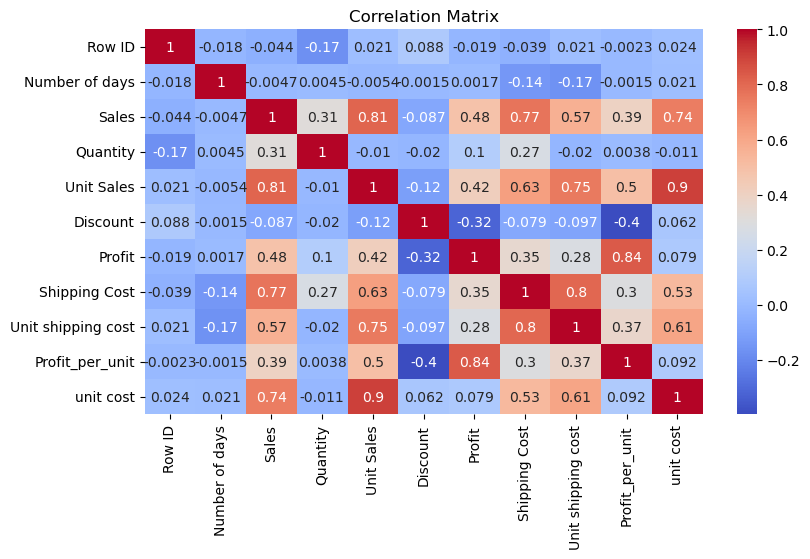

In [64]:
print('We will want to get some visualizations of the data. We begin by observing some correlation matrices or heatmaps will be helpful. A heatmap will help us note any correlations between \
independent features and dependent feature, Sales.')
print()
correlation_matrix = data.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(9, 5))

sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [65]:
klib.corr_mat(data)

,Row ID,Number of days,Sales,Quantity,Unit Sales,Discount,Profit,Shipping Cost,Unit shipping cost,Profit_per_unit,unit cost
Row ID,1.00,-0.02,-0.04,-0.17,0.02,0.09,-0.02,-0.04,0.02,-0.00,0.02
Number of days,-0.02,1.00,-0.00,0.00,-0.01,-0.00,0.00,-0.14,-0.17,-0.00,0.02
Sales,-0.04,-0.00,1.00,0.31,0.81,-0.09,0.48,0.77,0.57,0.39,0.74
Quantity,-0.17,0.00,0.31,1.00,-0.01,-0.02,0.10,0.27,-0.02,0.00,-0.01
Unit Sales,0.02,-0.01,0.81,-0.01,1.00,-0.12,0.42,0.63,0.75,0.50,0.90
Discount,0.09,-0.00,-0.09,-0.02,-0.12,1.00,-0.32,-0.08,-0.10,-0.40,0.06
Profit,-0.02,0.00,0.48,0.10,0.42,-0.32,1.00,0.35,0.28,0.84,0.08
Shipping Cost,-0.04,-0.14,0.77,0.27,0.63,-0.08,0.35,1.00,0.80,0.30,0.53
Unit shipping cost,0.02,-0.17,0.57,-0.02,0.75,-0.10,0.28,0.80,1.00,0.37,0.61
Profit_per_unit,-0.00,-0.00,0.39,0.00,0.50,-0.40,0.84,0.30,0.37,1.00,0.09


According to the Order Priority data, it appears the the most frequent order priority was medium.



Text(0.5, 1.0, 'Order Priority Chart')

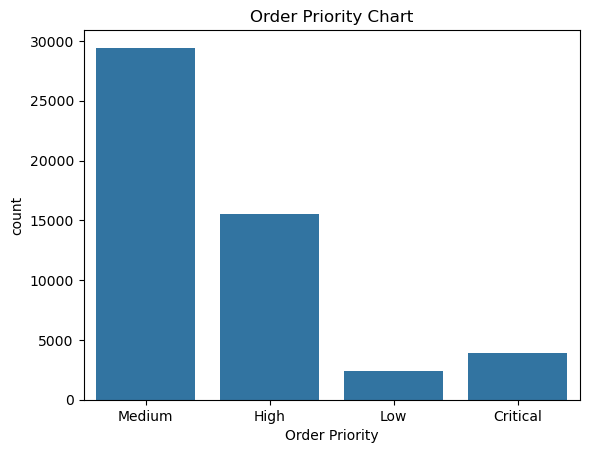

In [66]:
print('According to the Order Priority data, it appears the the most frequent order priority was medium.')
print()

ax = sns.countplot(x='Order Priority', data=data)

ax.set_title('Order Priority Chart')

When comparing the Order Priority and Shipping Class charts, we do not see much difference except that the corporate customers preferred critical order priority and same day.



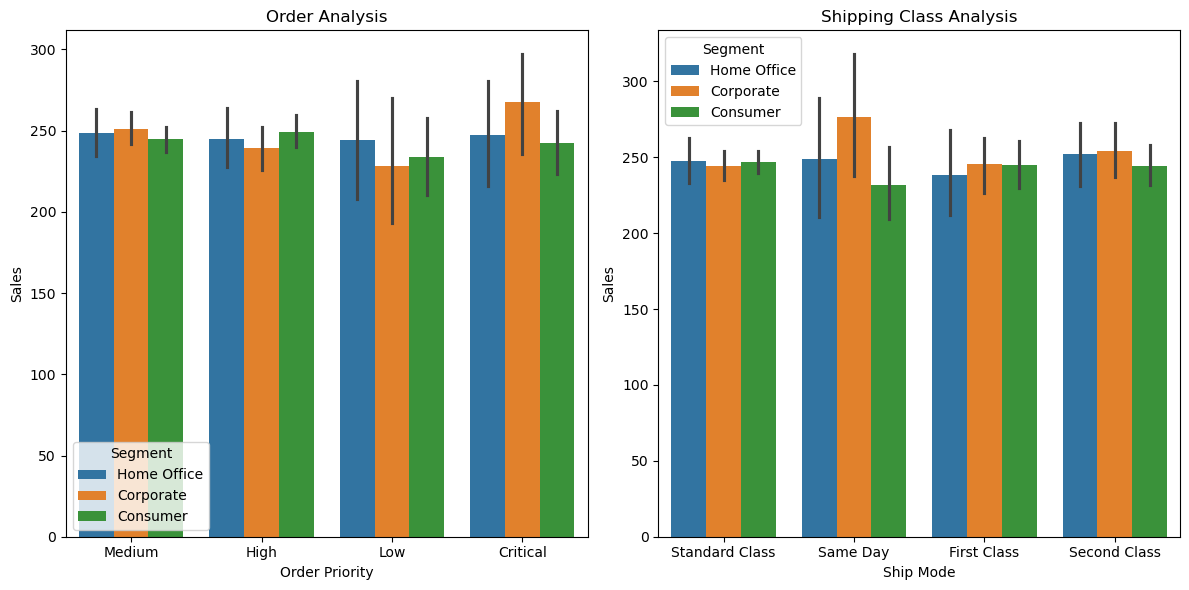

In [67]:
print('When comparing the Order Priority and Shipping Class charts, we do not see much difference except that the corporate customers \
preferred critical order priority and same day.')
print()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].set_title('Order Analysis')
sns.barplot(data, x="Order Priority", y="Sales", hue="Segment", ax=ax[0])

ax[1].set_title('Shipping Class Analysis')
sns.barplot(data, x="Ship Mode", y="Sales", hue="Segment",  ax=ax[1])

plt.tight_layout()

From the scatterplot we can see that in the Sub-Category, technology and office supplies, accounted for the most profit and losses, mainly binders, copiers, and machines.



<Axes: xlabel='Sub-Category', ylabel='Profit'>

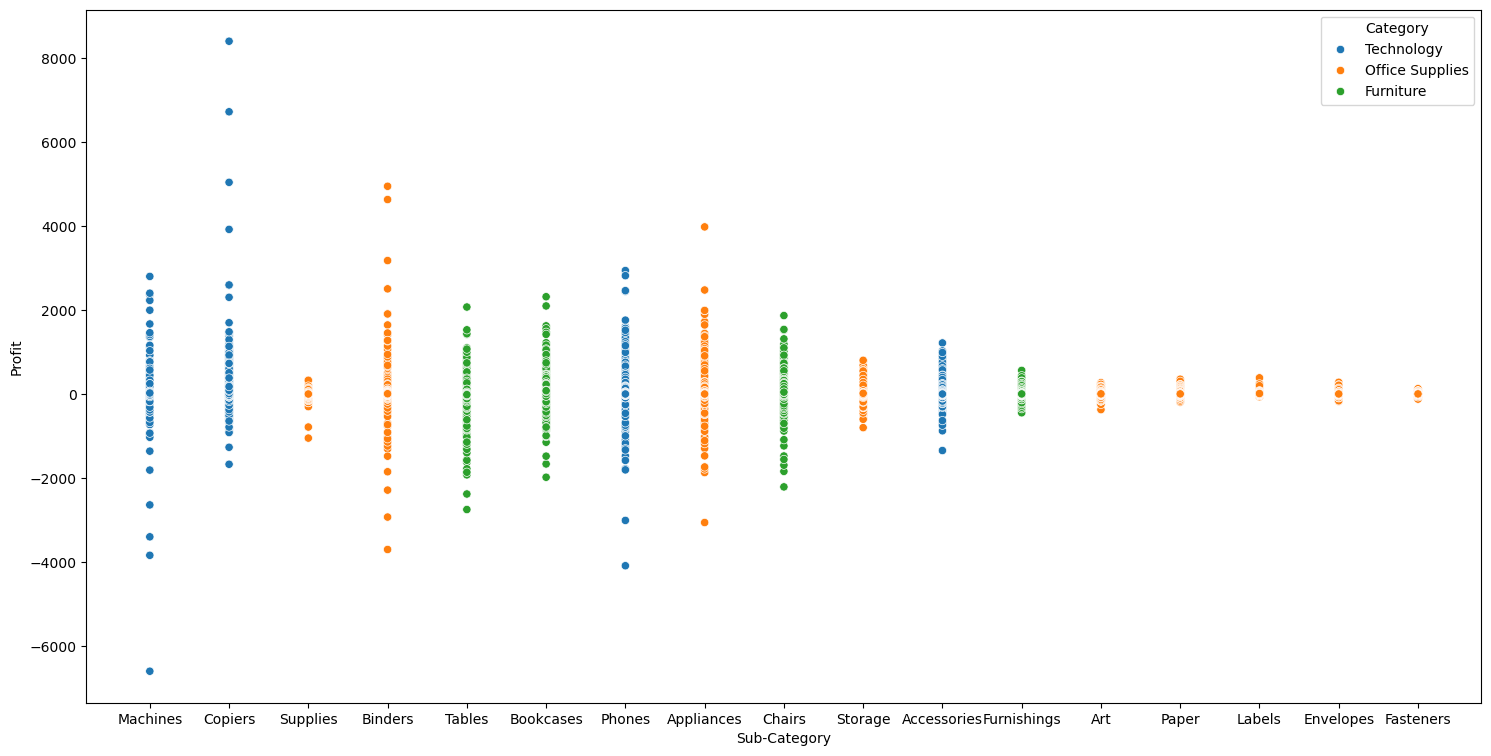

In [68]:
print('From the scatterplot we can see that in the Sub-Category, technology and office supplies, accounted for the most profit and losses, mainly \
binders, copiers, and machines.')
print()

fig, ax = plt.subplots(figsize=(18, 9))
sns.scatterplot(x="Sub-Category",
                    y="Profit",
                    hue="Category",
                    data=data)

According to the jointplot, the Shipping Cost and Sales features hava a strong correlation.


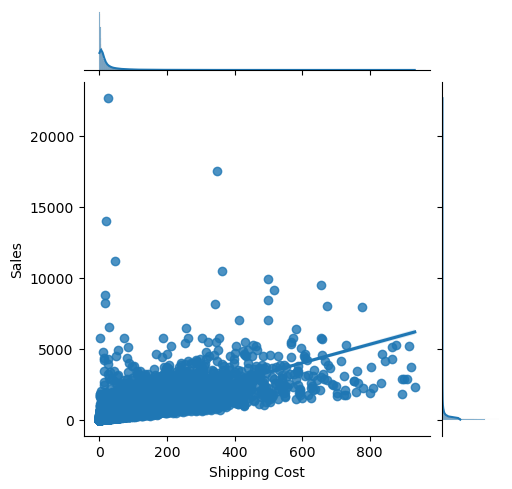

In [69]:
print('According to the jointplot, the Shipping Cost and Sales features hava a strong correlation.')

sns.jointplot(x="Shipping Cost", y="Sales", data=data, kind='reg', height=5)

In [70]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [71]:
orderDate_Sales_df = data.groupby(pd.Grouper(key='Order Date', freq='2ME'))['Sales'].sum().reset_index()

After converting the Order Date column to a datetime data type, we grouped the Order Date and set a 6 month intervals relative to the target feature Sales, in one hundred thousand increments. The data suggests up and down fluctuations in sales, with a steep fall just at the beginning of January 2020.



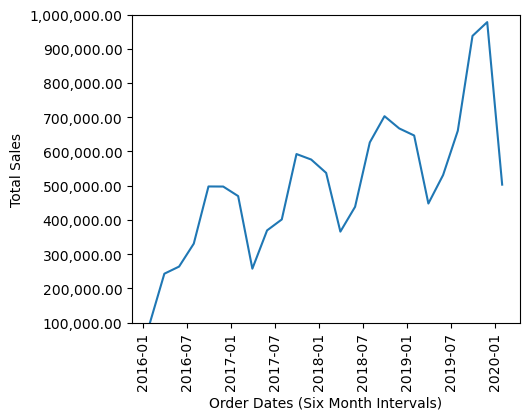

In [72]:
print('After converting the Order Date column to a datetime data type, we grouped the Order Date and set a 6 month \
intervals relative to the target feature Sales, in one hundred thousand increments. The data suggests up and down fluctuations \
in sales, with a steep fall just at the beginning of January 2020.')
print()

dates = orderDate_Sales_df['Order Date']
closing_price = orderDate_Sales_df['Sales']

fig, ax = plt.subplots(figsize=(5, 4)) 

plt.xlabel('Order Dates (Six Month Intervals)')
plt.ylabel('Total Sales')

ax = plt.gca();

ax.set_ylim(100000,1000000)

ylabels = ['{:,.2f}'.format(x) for x in ax.get_yticks()/1]
ax.set_yticklabels(ylabels)
plt.xticks(rotation=90)

# Create a line plot
plt.plot(dates, closing_price)

# Show the plot
plt.show()

We will want to check for outliers, or extreme values, in our numerical features, as they can skew our data when training our machine learning model in calculating our sales predictions. Numerous outliers can be observed in boxplots for Profit and Shipping Cost features.



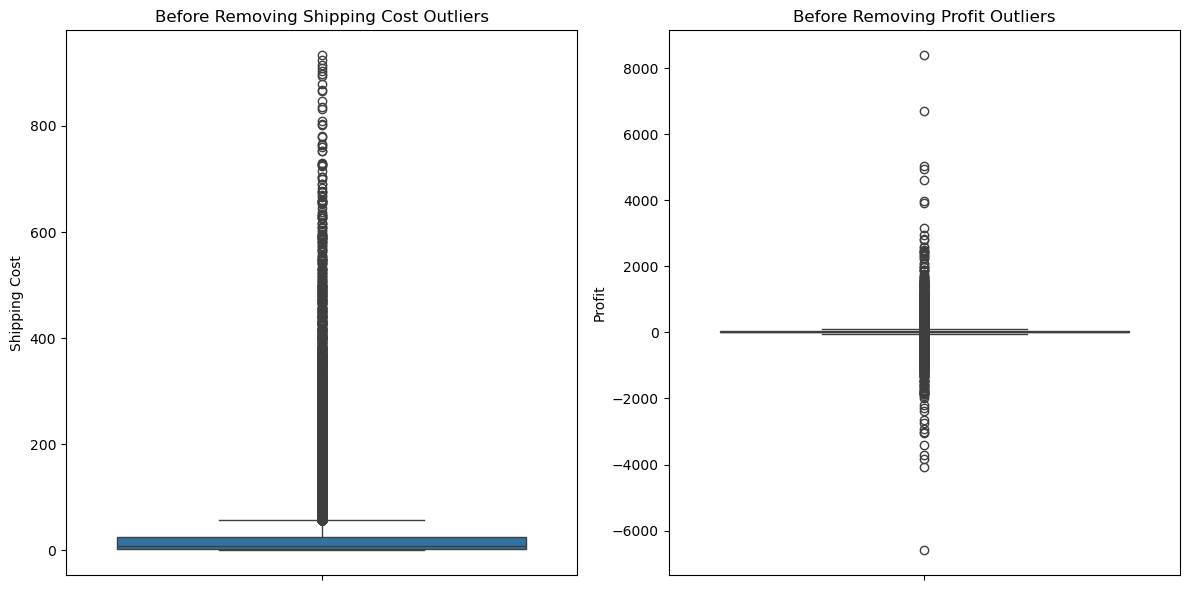

In [73]:
print('We will want to check for outliers, or extreme values, in our numerical features, as they can skew our data when \
training our machine learning model in calculating our sales predictions. Numerous outliers can be observed in boxplots \
for Profit and Shipping Cost features.')
print()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data['Shipping Cost'],ax=ax[0])
ax[0].set_title('Before Removing Shipping Cost Outliers')

sns.boxplot(data['Profit'],ax=ax[1])
ax[1].set_title('Before Removing Profit Outliers')


plt.tight_layout()

In [74]:
def outliers(df, ft):
    Quarter1 = data[ft].quantile(0.25)
    Quarter3 = data[ft].quantile(0.75)
    IQR = Quarter3 - Quarter1

    lower_bound = Quarter1 - 1.5 * IQR
    upper_bound = Quarter3 + 1.5 * IQR

    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    
    return ls

In [75]:
index_list = []
for feature in ['Unit shipping cost', 'Shipping Cost', 'Unit Sales', 'Profit', 'Quantity', 'unit cost']:
    index_list.extend(outliers(data, feature))

In [76]:
# Created a function to "remove" indices mapped to outlier values

def remove(data, ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data

In [77]:
clean_df = remove(data, index_list)

After some data wrangling, we can see the Profit and Shipping cost outliers be considerably reduced.



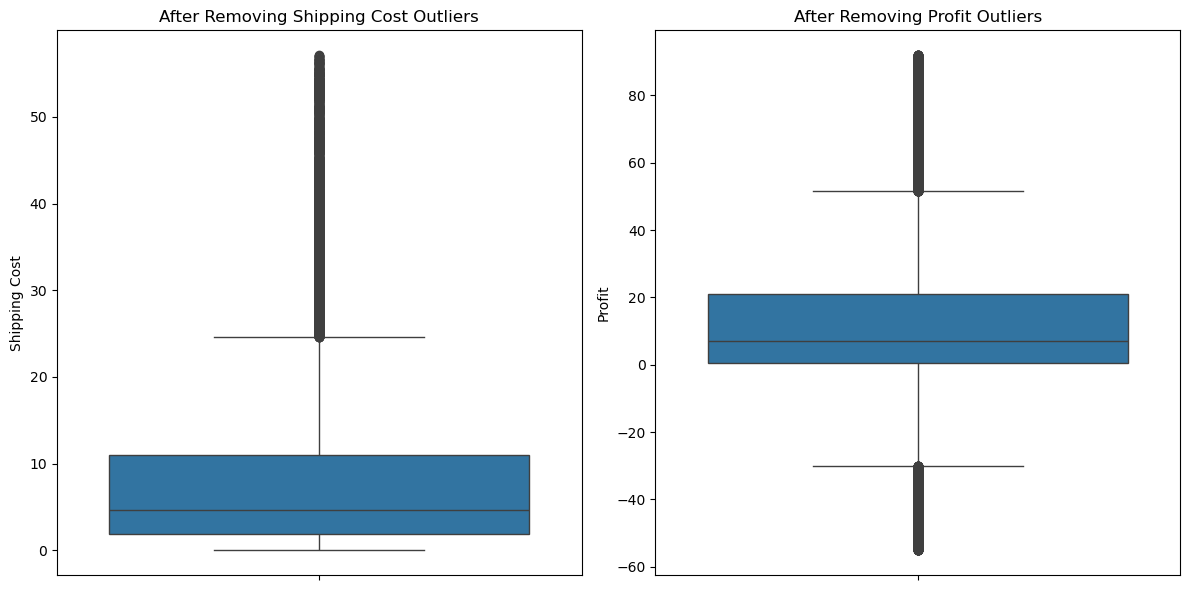

In [78]:
print('After some data wrangling, we can see the Profit and Shipping cost outliers be considerably reduced.')
print()

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(clean_df['Shipping Cost'],ax=ax[0])
ax[0].set_title('After Removing Shipping Cost Outliers')

sns.boxplot(clean_df['Profit'],ax=ax[1])
ax[1].set_title('After Removing Profit Outliers')


plt.tight_layout()


In [79]:
print('Now before moving into checking for multicollinearity through Variance Inflation Factor processing, we need to see \
what features have a high or low correlation with the target feature, Sales.')
klib.corr_mat(clean_df)

Now before moving into checking for multicollinearity through Variance Inflation Factor processing, we need to see what features have a high or low correlation with the target feature, Sales.


,Row ID,Number of days,Sales,Quantity,Unit Sales,Discount,Profit,Shipping Cost,Unit shipping cost,Profit_per_unit,unit cost
Row ID,1.00,-0.02,-0.13,-0.20,0.00,0.09,-0.06,-0.13,-0.00,-0.01,0.00
Number of days,-0.02,1.00,0.06,0.01,0.07,-0.01,0.03,-0.14,-0.16,0.03,0.09
Sales,-0.13,0.06,1.00,0.33,0.74,-0.18,0.45,0.78,0.55,0.30,0.72
Quantity,-0.20,0.01,0.33,1.00,-0.16,-0.04,0.19,0.31,-0.16,-0.06,-0.15
Unit Sales,0.00,0.07,0.74,-0.16,1.00,-0.20,0.39,0.57,0.78,0.49,0.94
Discount,0.09,-0.01,-0.18,-0.04,-0.20,1.00,-0.54,-0.17,-0.18,-0.55,-0.01
Profit,-0.06,0.03,0.45,0.19,0.39,-0.54,1.00,0.40,0.32,0.81,0.12
Shipping Cost,-0.13,-0.14,0.78,0.31,0.57,-0.17,0.40,1.00,0.76,0.26,0.51
Unit shipping cost,-0.00,-0.16,0.55,-0.16,0.78,-0.18,0.32,0.76,1.00,0.39,0.67
Profit_per_unit,-0.01,0.03,0.30,-0.06,0.49,-0.55,0.81,0.26,0.39,1.00,0.17


In [80]:
print('We also drop additional categorical features that do not contribute to our end goal. As a result, we will drop \
Ship Date, Number of days, State, Profit_per_unit, Discount, Ship Mode, Order Priority, Order Date, Row ID.')
print()
non_numerical_df = data.select_dtypes(include=['object'])
print(non_numerical_df)

We also drop additional categorical features that do not contribute to our end goal. As a result, we will drop Ship Date, Number of days, State, Profit_per_unit, Discount, Ship Mode, Order Priority, Order Date, Row ID.

        Ship Date       Ship Mode      Segment             State  \
0       3/23/2016  Standard Class  Home Office  British Columbia   
1       11/5/2019        Same Day    Corporate      Saskatchewan   
2        4/4/2019     First Class    Corporate            Quebec   
3       12/3/2018  Standard Class     Consumer      Saskatchewan   
4      12/18/2017     First Class     Consumer           Alberta   
...           ...             ...          ...               ...   
51285    5/5/2016     First Class     Consumer      Newfoundland   
51286    9/7/2018     First Class     Consumer  British Columbia   
51287   11/5/2019    Second Class  Home Office          Manitoba   
51288  10/21/2019        Same Day  Home Office          Manitoba   
51289   9/13/2016        Same Da

In [81]:
clean_df.drop(['Ship Date', 'Number of days', 'State', 'Profit_per_unit', 'Discount', 'Ship Mode', 'Order Priority', 'Order Date', 'Row ID'], axis=1, inplace=True)

Text(0.5, 1.0, 'Correlation Matrix')

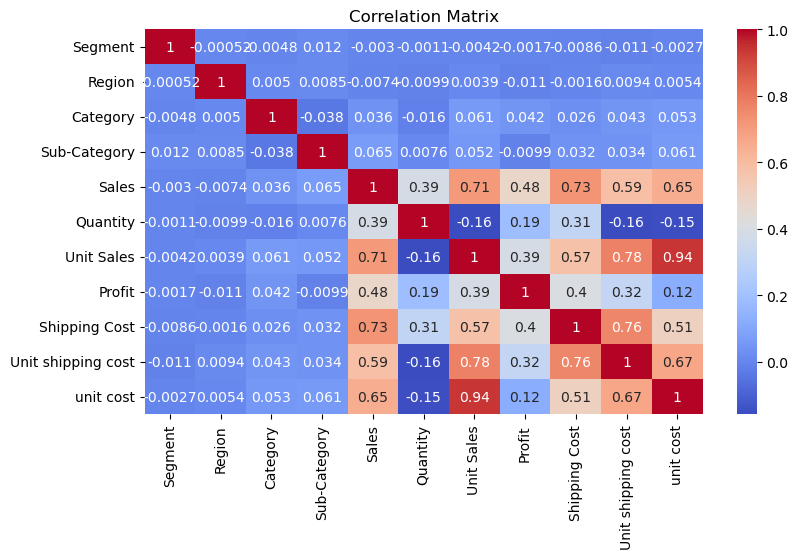

In [107]:
print("Checking once more how correlated the remaining numerical predictor variables are before looking at the variance inflation factor scores.")

correlation_matrix = clean_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(9, 5))

sns.heatmap(correlation_matrix, ax=ax, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
clean_df['Category']=le.fit_transform(clean_df['Category'])
clean_df['Sub-Category']=le.fit_transform(clean_df['Sub-Category'])
clean_df['Segment']=le.fit_transform(clean_df['Segment'])
clean_df['Region']=le.fit_transform(clean_df['Region'])

In [84]:
print('We have gone ahead now and used label encoding to feature engineer our remaining categorical columns\' values to \
numerical format, per the observed data types, int32.')
print()
clean_df.info(verbose=True)

We have gone ahead now and used label encoding to feature engineer our remaining categorical columns' values to numerical format, per the observed data types, int32.

<class 'pandas.core.frame.DataFrame'>
Index: 37941 entries, 4955 to 51289
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Segment             37941 non-null  int32  
 1   Region              37941 non-null  int32  
 2   Category            37941 non-null  int32  
 3   Sub-Category        37941 non-null  int32  
 4   Sales               37941 non-null  float64
 5   Quantity            37941 non-null  int64  
 6   Unit Sales          37941 non-null  float64
 7   Profit              37941 non-null  float64
 8   Shipping Cost       37941 non-null  float64
 9   Unit shipping cost  37941 non-null  float64
 10  unit cost           37941 non-null  float64
dtypes: float64(6), int32(4), int64(1)
memory usage: 2.9 MB


In [86]:
def compute_vif(features):
    """Compute VIF score using variance_inflation_factor() function"""
    vif_data = pd.DataFrame()
    vif_data["feature"] = features
    vif_data["VIF"] = [variance_inflation_factor(clean_df[features].values, i) for i in range(len(features))]
    return vif_data.sort_values(by=['VIF']).reset_index(drop=True)


In [87]:
print('Upon checking for multicollinearity, we see a high variance inflation factor, which can lead to an overfitted model \
and an inaccurate r2 score.')
print()
features = clean_df.drop(columns=['Sales']).columns.to_list()
vif_data = compute_vif(features)
vif_data

Upon checking for multicollinearity, we see a high variance inflation factor, which can lead to an overfitted model and an inaccurate r2 score.



,feature,VIF
0,Segment,1.669469
1,Region,2.816792
2,Sub-Category,2.932021
3,Category,3.578061
4,Quantity,4.894570
5,Profit,5.042965
6,Shipping Cost,8.141838
7,Unit shipping cost,12.370676
8,unit cost,51.868864
9,Unit Sales,79.053078


In [88]:
features.remove('Unit Sales')
features.remove('Unit shipping cost')
features.remove('Quantity')

In [89]:
print('After dropping the highly correlated independent variables Unit Sales, Unit shipping cost and Quantity, our \
variance inflation factor has been immensely reduced to just over 3.0.')
print()

vif_data = compute_vif(features)
vif_data

After dropping the highly correlated independent variables Unit Sales, Unit shipping cost and Quantity, our variance inflation factor has been immensely reduced to just over 3.0.



,feature,VIF
0,Profit,1.491380
1,Segment,1.633297
2,unit cost,2.444956
3,Region,2.605294
4,Sub-Category,2.667877
5,Shipping Cost,2.759497
6,Category,3.096403


Before splitting the dataset into train and test sets, we will check for the distribution of our target feature. We can observe that the Sales variable is right skewed; we will attempt to transform it into a more Gaussian and normal distribution.



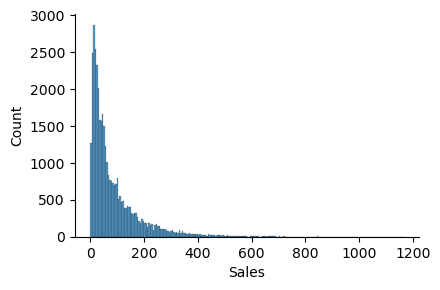

In [90]:
print('Before splitting the dataset into train and test sets, we will check for the distribution of our target feature. We can observe that \
the Sales variable is right skewed; we will attempt to transform it into a more Gaussian and normal distribution.')
print()
sns.displot(clean_df['Sales'], height=3, aspect=1.5)

In [91]:
clean_df['Sales'] = np.log1p(clean_df['Sales'])

After transforming our dependent feature, Sales, we were able to gain a more normal distribution of values.



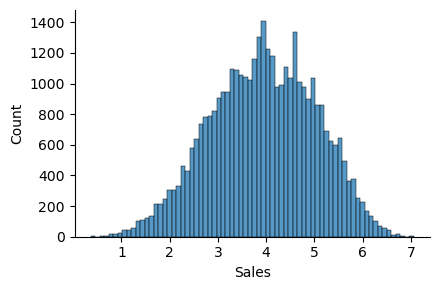

In [92]:
print('After transforming our dependent feature, Sales, we were able to gain a more normal distribution of values.')
print()
sns.displot(clean_df['Sales'], height=3, aspect=1.5)

In [93]:
x = clean_df.drop(['Sales', 'Unit Sales', 'Unit shipping cost', 'Quantity'], axis=1)

In [94]:
print('We have decided upon these independent features for training our machine learning model, now we proceed to splitting the our \
dataset into train and test.')
print()
x.describe()

We have decided upon these independent features for training our machine learning model, now we proceed to splitting the our dataset into train and test.



,Segment,Region,Category,Sub-Category,Profit,Shipping Cost,unit cost
count,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000,37941.000000
mean,0.664664,1.247147,0.988772,7.439050,11.589866,8.377491,24.008869
std,0.766051,0.829820,0.520006,4.792864,23.958772,9.750621,26.758216
min,0.000000,0.000000,0.000000,0.000000,-55.125000,0.000000,0.210000
25%,0.000000,0.000000,1.000000,3.000000,0.552000,1.880000,6.870000
50%,0.000000,1.000000,1.000000,8.000000,7.125000,4.690000,14.120000
75%,1.000000,2.000000,1.000000,12.000000,20.970000,10.990000,30.510000
max,2.000000,2.000000,2.000000,16.000000,91.968000,57.120000,150.870000


In [95]:
y = clean_df['Sales']

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=42, test_size=0.2)

We have just split our dataset for training and testing; however we want to see if any skewness exists in our train dataset by running it through a distribution plot. There is indeed some skewness that can be perhaps corrected. We will utilize feature scaling and power transformation to attempt normalizing the train set.


(-80.0, 80.0)

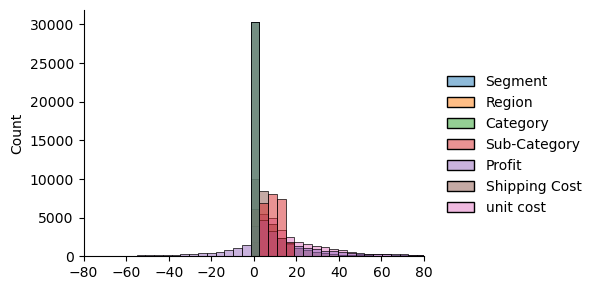

In [97]:
print('We have just split our dataset for training and testing; however we want to see if any skewness exists in our \
train dataset by running it through a distribution plot. There is indeed some skewness that can be perhaps corrected. We will \
utilize feature scaling and power transformation to attempt normalizing the train set.')

sns.displot(X_train,bins=50,kde=False, height=3, aspect=1.5)

plt.gca().set_xlim([-80, 80])


In [98]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()



In [99]:
sc_transformed = sc.fit_transform(X_train)
sc_test_transformed = sc.transform(X_test)

In [100]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()


power_transformed = pt.fit_transform(X_train)
power_test_transformed = pt.transform(X_test)

After running through feature scaling through StandardScaler, and power transformation with the Yeo-Johnson method we can confirm that a power transformation achieved a better normal distribution of our values in the training dataset. The Yeo-Johnson method of power transformation is beneficial for transforming negative values, such as those present in our independent features.



Text(0.5, 1.0, 'Power Transformation')

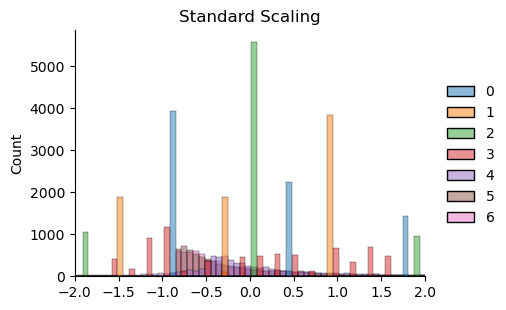

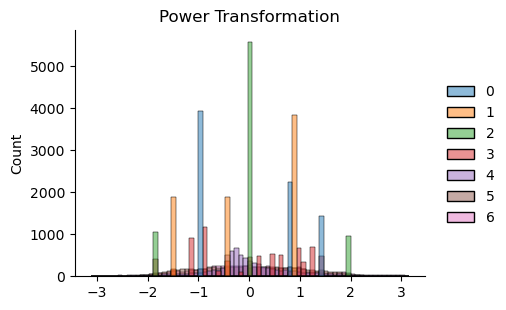

In [101]:
print('After running through feature scaling through StandardScaler, and power transformation with the Yeo-Johnson method \
we can confirm that a power transformation achieved a better normal distribution of our values in the training dataset. The \
Yeo-Johnson method of power transformation is beneficial for transforming negative values, such as those present \
in our independent features.')
print()

sns.displot(sc_test_transformed, height=3, aspect=1.5)
plt.gca().set_xlim([-2.0, 2.0])
plt.title('Standard Scaling')

sns.displot(power_test_transformed, height=3, aspect=1.5)
plt.title('Power Transformation')

In [102]:
from sklearn.linear_model import LinearRegression

lr= LinearRegression()
lr.fit(power_transformed , Y_train)

Y_pred_lr=lr.predict(power_test_transformed)

{
    "tags": [
        "hide-output"
    ]
}


{'tags': ['hide-output']}

In [103]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print('Once our train and test datasets were power transformed, we fit the model using our train and test dataset with Linear Regression. The \
resulting evaluation scores were as follows:')
print()

print('\033[1mr2_score:\033[0m')
print(r2_score(Y_test,Y_pred_lr))
print('\033[1mmean_absolute_error_score\033[0m')
print(mean_absolute_error(Y_test,Y_pred_lr))
print('\033[1mmean_squared_error_score\033[0m')
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

Once our train and test datasets were power transformed, we fit the model using our train and test dataset with Linear Regression. The resulting evaluation scores were as follows:

r2_score:
0.8631329046346463
mean_absolute_error_score
0.31725228431420066
mean_squared_error_score
0.401425030481003


Regression line and Residual plots are shown for further data inference. It can be observed that while both plots display symmetry regarding data points, the scatter plot to the left has a deviation at the left edge.



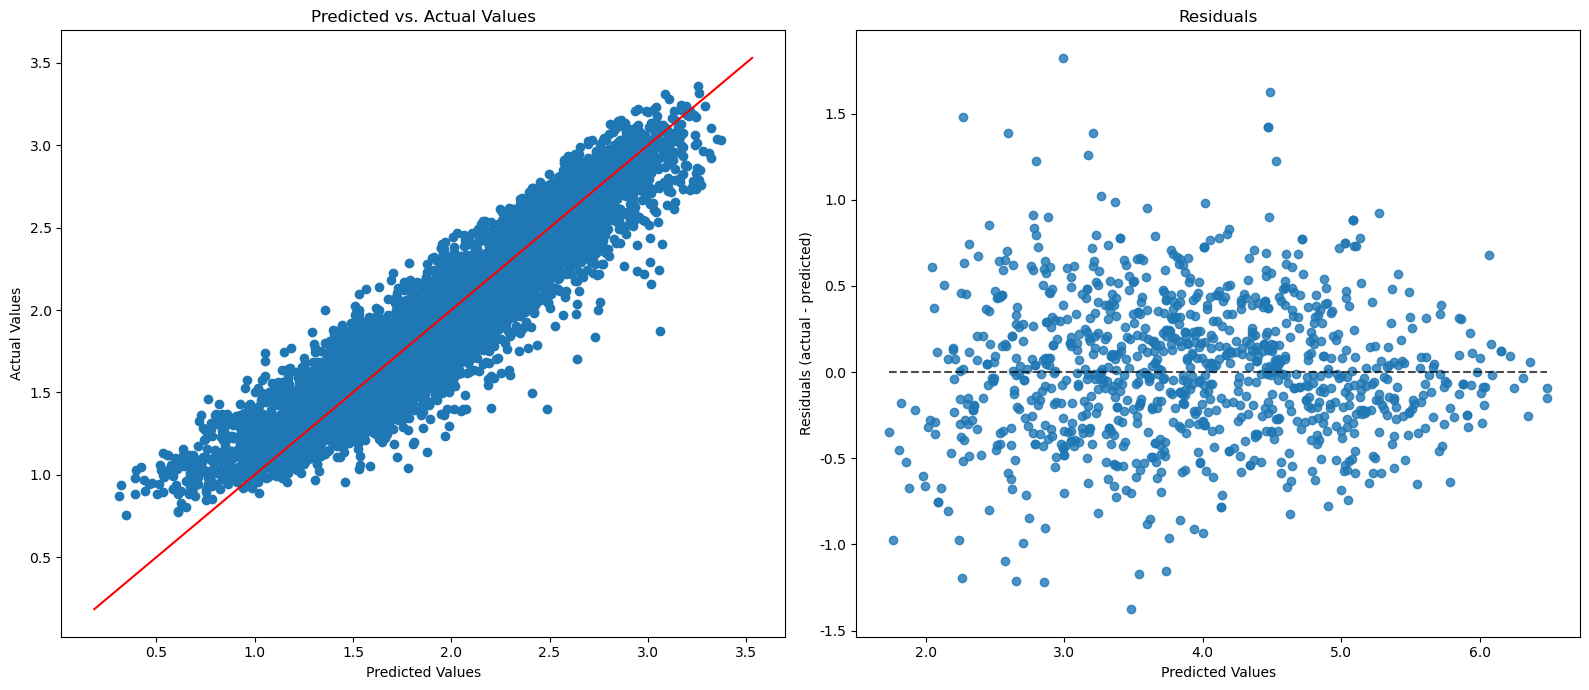

In [104]:
from sklearn.metrics import PredictionErrorDisplay

print('Regression line and Residual plots are shown for further data inference. It can be observed that while both plots \
display symmetry regarding data points, the scatter plot to the left has a deviation at the left edge.')
print()

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

axes[0].scatter(Y_test, Y_pred_lr)
axes[0].plot([y.min(), y.max()],[y.min(), y.max()], color='red')
axes[0].set_ylabel('Actual Values')
axes[0].set_xlabel('Predicted Values')
axes[0].set_title('Predicted vs. Actual Values')

ylabels = ['{:,.1f}'.format(x) for x in axes[0].get_yticks()/2.0]
axes[0].set_yticklabels(ylabels)

xlabels = ['{:,.1f}'.format(x) for x in axes[0].get_xticks()/2.0]
axes[0].set_xticklabels(xlabels)


display = PredictionErrorDisplay.from_predictions(y_true=Y_test, y_pred=Y_pred_lr, ax=axes[1])

axes[1].set_xlabel('Predicted Values')
axes[1].set_title('Residuals')


ylabels = ['{:,.1f}'.format(x) for x in axes[1].get_yticks()/1]
axes[1].set_yticklabels(ylabels)

xlabels = ['{:,.1f}'.format(x) for x in axes[1].get_xticks()/1]
axes[1].set_xticklabels(xlabels)


plt.tight_layout()
plt.show()

In [105]:
import ipywidgets as widgets
from IPython.display import clear_output, display


print('The user interface below can be used to make a sales prediction based on inputs.')
print()

def capture_values(b):
    region_value = regional_features_to_numerical[dropdown_region.value]
    segment_value = segment_features_to_numerical[dropdown_segment.value]
    category_value = category_features_to_numerical[dropdown_category.value]
    sub_category_value = sub_category_features_to_numerical[dropdown_sub_category.value]
    profit_value = profit_slider.value
    shipping_cost_value = shipping_cost_slider.value
    unit_cost_value = unit_cost_slider.value

    features_input_df = pd.DataFrame(columns=['Segment', 'Region',	'Category',	'Sub-Category',	'Profit',  'Shipping Cost',	'unit cost'])
    
    column_values = {'Segment':segment_value, 'Region':region_value, 'Category':category_value, 'Sub-Category':sub_category_value,
                     'Profit':profit_value, 'Shipping Cost':shipping_cost_value, 'unit cost':unit_cost_value}
    
    
    features_input_df.loc[len(features_input_df)] = column_values

    transform_prediction = pt.transform(features_input_df)
    prediction = lr.predict(transform_prediction)

    features_input_df[0:0]
    
    with output:
        clear_output()
        print()
        print("Predicted sales:", format(float(np.exp(prediction.item())), '.2F'))
        




regional_features_to_numerical = {'Western Canada': 2, 'Atlantic Canada':0, 'Centeral Canada':1}
segment_features_to_numerical = {'Home Office':2, 'Consumer':0, 'Corporate':1}
category_features_to_numerical = {'Furniture':0, 'Office Supplies':1, 'Technology':2}
sub_category_features_to_numerical = {'Machines':11, 'Copiers':6, 'Supplies':15, 'Binders':3, 'Tables':16,
       'Bookcases':4, 'Phones':13, 'Appliances':1, 'Chairs':5, 'Storage':14,
       'Accessories':0, 'Furnishings':9, 'Art':2, 'Paper':12, 'Labels':10,
       'Envelopes':7, 'Fasteners':8}


dropdown_region = widgets.Dropdown(options=['Western Canada', 'Atlantic Canada', 'Centeral Canada'], description="Select Region",  value='Western Canada')
dropdown_segment = widgets.Dropdown(options=['Home Office', 'Consumer', 'Corporate'], description="Select Segment", value='Home Office',  style={'description_width': 'initial'})
dropdown_category = widgets.Dropdown(options=['Furniture', 'Office Supplies', 'Technology'], description="Select Category", value='Technology',  style={'description_width': 'initial'})
dropdown_sub_category = widgets.Dropdown(options=['Machines', 'Copiers', 'Supplies', 'Binders', 'Tables',
                                              'Bookcases', 'Phones', 'Appliances', 'Chairs', 'Storage',
                                              'Accessories', 'Furnishings', 'Art', 'Paper', 'Labels',
                                              'Envelopes', 'Fasteners'], description="Select Sub-Category", value='Machines',  style={'description_width': 'initial'})

profit_slider = widgets.FloatSlider(
 value=0,
 min=-91, 
 max=152, 
 step=0.01,
 description='Select a Profit value',
 style={'description_width':'initial'}
)

shipping_cost_slider = widgets.FloatSlider(
 value=0,
 min=0, 
 max=152, 
 step=0.01,
 description='Select a Shipping Cost value',
 style={'description_width':'initial'}
)

unit_cost_slider = widgets.FloatSlider(
 value=0,
 min=0, 
 max=228, 
 step=0.01,
 description='Select a Unit Cost value',
 style={'description_width':'initial'}
)

print('\033[1mFor more precise slider values, click on the value box next to desired slider and set a custom value, then press enter.\033[0m')
print()

button_widget = widgets.Button(description='Calculate prediction')
button_widget.on_click(capture_values)

output = widgets.Output()

display(widgets.VBox([dropdown_region, dropdown_segment, dropdown_category, dropdown_sub_category, profit_slider, shipping_cost_slider, unit_cost_slider, button_widget]), output)

The user interface below can be used to make a sales prediction based on inputs.

For more precise slider values, click on the value box next to desired slider and set a custom value, then press enter.



Output()

In [106]:
print('\n')